In [5]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
import numpy as np

### The goal
- To explore what kind of books sell the most (aka what do the people want to read?)

### Questions to ask
- Which genre sells the most?
- What is the year of publication for each of these bestsellers?
- What is the distribution of sales for each language of origin?
- Which author has the most sales of all time?

Assumptions
- All time best selling books from 1304 to 2018.
- The dataset lacks specific location data for measuring sales, which, given the figures are in the millions, suggests they likely represent global bestsellers.
- The term "best-selling" refers to the expected number of copies sold for each book, not the number of books printed or currently owned. This list excludes comic books and textbooks. The books are arranged in the order of the greatest sales estimate reported by credible, independent sources ([source](https://www.kaggle.com/datasets/drahulsingh/best-selling-books/data)).

Dataset source: https://www.kaggle.com/datasets/drahulsingh/best-selling-books/data

In [6]:
books = pd.read_csv('bestselling-books.csv')
books.head()

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,"Fantasy, Children's literature"
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga


## Understanding & cleaning the dataset

In [7]:
books.info() # overall information on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          174 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


In [8]:
books = books.replace(' ', np.nan) # get rid of empty values
books[books.isna().any(axis=1)] # to get all rows with Na                                  # view df with NaN rows only

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre


After checking for rows with empty value in the Genre column, I updated the datasets by manually finding the titles and added. Since it's public information, it wasn't a challenging task.

In [9]:
books.nunique() # what are the unique variables in each column

Book                             174
Author(s)                        157
Original language                 16
First published                   95
Approximate sales in millions     47
Genre                            108
dtype: int64

In [10]:
books.describe() # summarize the dataset

,First published,Approximate sales in millions
count,174.000000,174.000000
mean,1962.522989,30.097126
std,64.268737,27.957985
min,1304.000000,10.000000
25%,1947.000000,14.000000
50%,1974.000000,20.000000
75%,1995.000000,36.300000
max,2018.000000,200.000000


In [11]:
books = books.rename(columns={'Approximate sales in millions': 'Total sales'})
books

,Book,Author(s),Original language,First published,Total sales,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,"Fantasy, Children's literature"
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga
...,...,...,...,...,...,...
169,The Goal,Eliyahu M. Goldratt,English,1984,10.0,Business fable
170,Fahrenheit 451,Ray Bradbury,English,1953,10.0,Dystopian fiction
171,Angela's Ashes,Frank McCourt,English,1996,10.0,"Autobiography, memoir"
172,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1929,10.0,Autobiography


In [12]:
# remove foreign characters from dataframe
slice_string = lambda x: x.split('(')[0].strip() # define a lambda function to slice the string at the first occurrence of '('

books['Book'] = books['Book'].apply(slice_string) # apply the lambda function to each element in the 'Book' column
books

,Book,Author(s),Original language,First published,Total sales,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince,Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,"Fantasy, Children's literature"
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber,Cao Xueqin,Chinese,1791,100.0,Family saga
...,...,...,...,...,...,...
169,The Goal,Eliyahu M. Goldratt,English,1984,10.0,Business fable
170,Fahrenheit 451,Ray Bradbury,English,1953,10.0,Dystopian fiction
171,Angela's Ashes,Frank McCourt,English,1996,10.0,"Autobiography, memoir"
172,The Story of My Experiments with Truth,Mohandas Karamchand Gandhi,Gujarati,1929,10.0,Autobiography


## Which genre sells the most?

In [13]:
book_genre = books[['Book', 'Genre', 'Total sales']] # create a df with Book, Genre, and Sales
book_genre['Genre'] = book_genre['Genre'].str.lower() # transform genre values to all lowercase
book_genre[['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6']] = book_genre['Genre'].str.split(', ', expand=True) # expand the Genre column to 6 to correspond to all available genres in the columns
book_genre = pd.melt(book_genre, id_vars=['Book', 'Total sales'], value_vars=['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6']) # unpivot table
book_genre = book_genre.replace(to_replace='None', value=np.nan).dropna() # replace None to NA and drop rows with NA
book_genre = book_genre.rename(columns={'value': 'Genre'}) 
book_genre

/var/folders/nb/jqcy_5sd7md5v41w6vk_tgcc0000gn/T/ipykernel_13015/3460198305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_genre['Genre'] = book_genre['Genre'].str.lower() # transform genre values to all lowercase
/var/folders/nb/jqcy_5sd7md5v41w6vk_tgcc0000gn/T/ipykernel_13015/3460198305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_genre[['Genre1', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6']] = book_genre['Genre'].str.split(', ', expand=True) # expand the Genre column to 6 to co

,Book,Total sales,variable,Genre
0,A Tale of Two Cities,200.0,Genre1,historical fiction
1,The Little Prince,200.0,Genre1,novella
2,Harry Potter and the Philosopher's Stone,120.0,Genre1,fantasy
3,And Then There Were None,100.0,Genre1,mystery
4,Dream of the Red Chamber,100.0,Genre1,family saga
...,...,...,...,...
735,Cosmos,40.0,Genre5,philosophy
760,Who Moved My Cheese?,29.0,Genre5,leadership
775,Mockingjay,20.0,Genre5,action thriller
847,Catch-22,10.0,Genre5,historical fiction


In [14]:
genre = book_genre.groupby('Genre').agg({'Total sales': 'sum', 'Book': 'count'}).reset_index() # group by 'Original language' and calculate sum of 'Approximate sales in millions' and count of books
genre = genre.rename(columns={'Book': 'Number of books'}) 

genre

,Genre,Total sales,Number of books
0,absurdist fiction,10.0,1
1,action thriller,20.0,1
2,adult fiction,28.0,2
3,adventure,134.0,4
4,anthropology,60.0,2
...,...,...,...
97,unfinished satirical novel,20.0,1
98,war,20.0,1
99,war fiction,10.0,1
100,war novel,85.3,3


In [15]:
# sort the DataFrame by 'Number of books' and 'Total sales' columns in descending order and take the top 10 rows
genre_top_10 = genre.sort_values('Number of books', ascending=False).head(10)
genre_sales_top_10 = genre.sort_values('Total sales', ascending=False).head(10)

Text(0.5, 1.0, 'Number of books by genre')

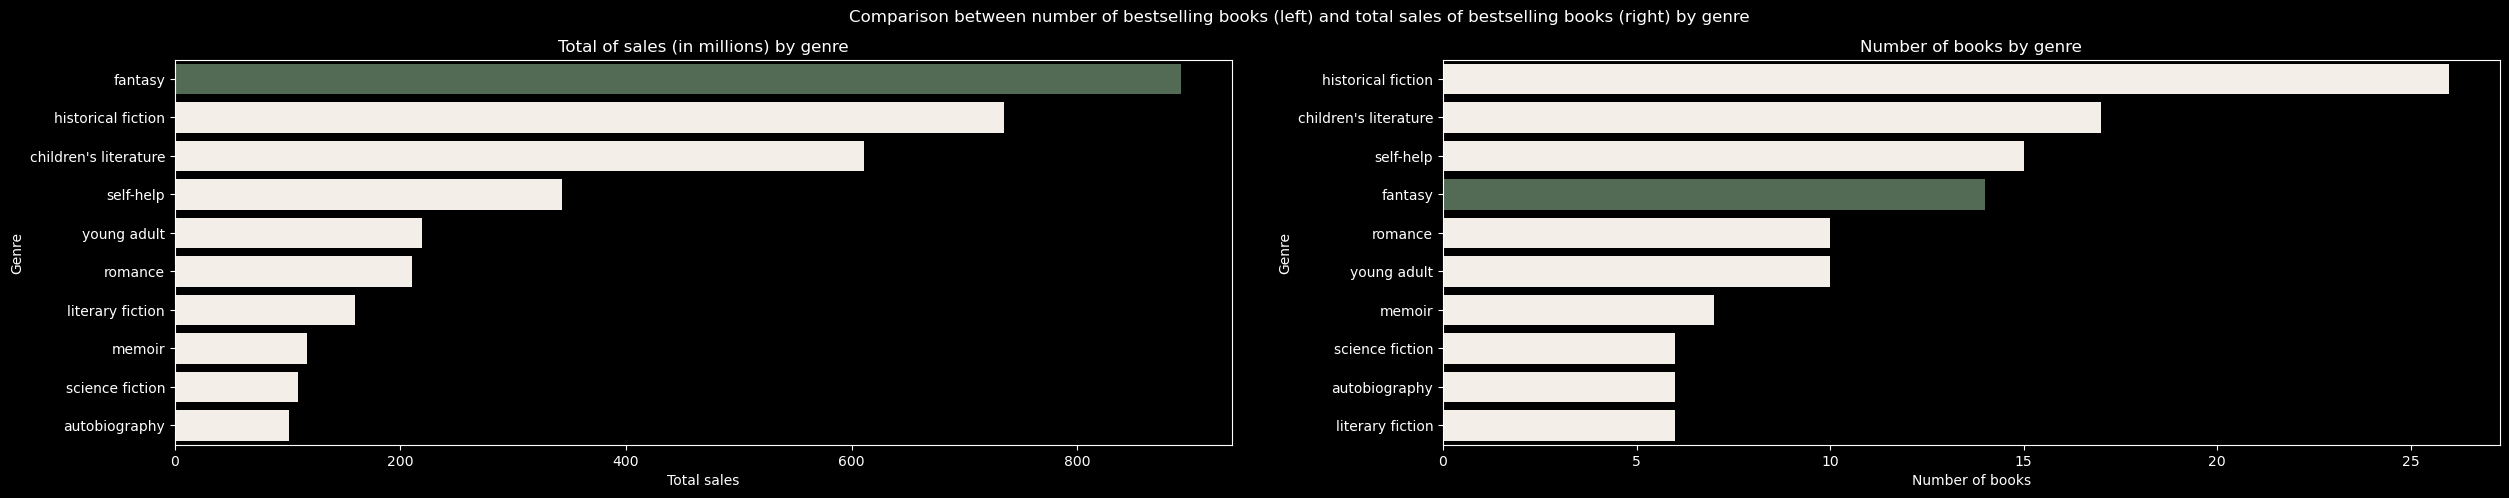

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=(30,5))
fig.suptitle('Comparison between number of bestselling books (left) and total sales of bestselling books (right) by genre')

specific_value = 'fantasy' # define the specific value

# define the colors based on the comparison
cols0 = ['#4F6F52' if x == specific_value else '#F5EFE6' for x in genre_sales_top_10['Genre']]
cols1 = ['#4F6F52' if x == specific_value else '#F5EFE6' for x in genre_top_10['Genre']]

# create side-by-side barplots
sns.barplot(data=genre_top_10, 
            x='Total sales',
            y='Genre', 
            orient='h',
            order=genre_top_10.sort_values('Total sales',ascending = False)['Genre'],
            ax=ax[0],
            palette=cols0)
ax[0].set_title('Total of sales (in millions) by genre')

sns.barplot(data=genre_top_10, 
            x='Number of books',
            y='Genre',
            order=genre_top_10.sort_values('Number of books',ascending = False)['Genre'],
            ax=ax[1],
            palette=cols1)
ax[1].set_title('Number of books by genre')


There's a different between the total sales and the number of books with the genre tag appear on the list.

The genre that sells the most is Fantasy, followed by Historical Fiction. However, there are less fantasy novels than the historical fiction novels appearing on the list.

## What is the year of publication for each of these bestsellers?

In [17]:
book_by_year = books.groupby('First published')['Book'].count().reset_index() # create a dataframe with count of books, group by year
print(book_by_year)

    First published  Book
0              1304     1
1              1788     1
2              1791     1
3              1813     1
4              1859     1
..              ...   ...
90             2012     4
91             2014     1
92             2015     1
93             2016     1
94             2018     2

[95 rows x 2 columns]


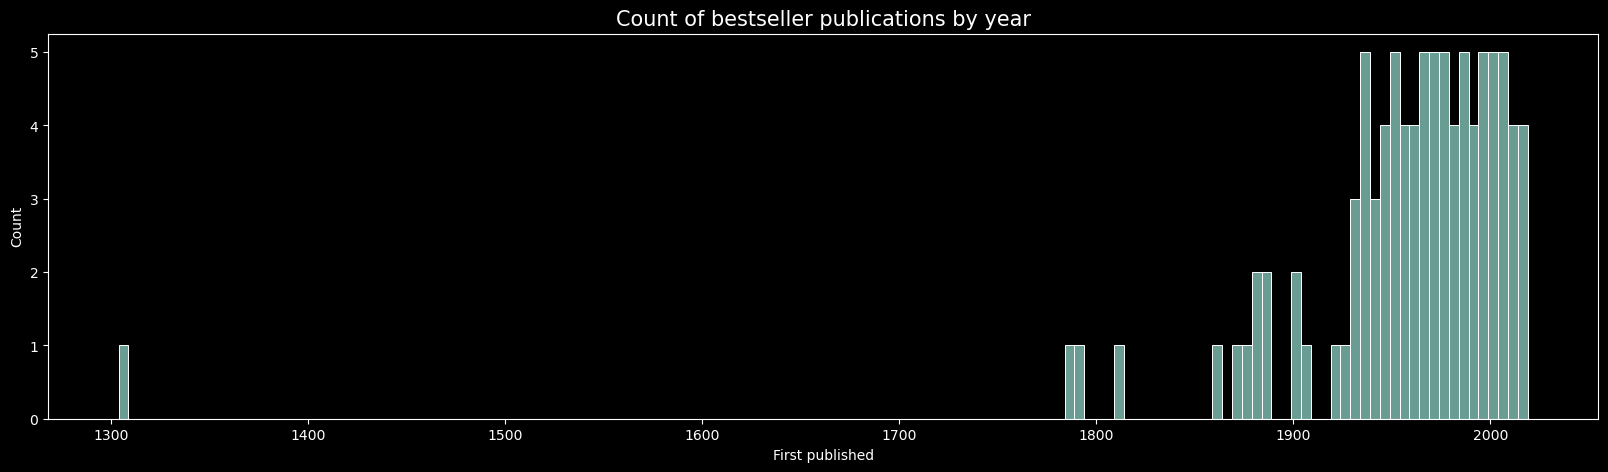

In [18]:
plt.figure(figsize=(20, 5))
sns.histplot(data=book_by_year, x='First published', binwidth=5)
plt.title('Count of bestseller publications by year', fontdict={'size': 15})
plt.show()

The duration of how long a book has been published doesn't contribute its sales. There are a lot of books that were published in the 2010s and still made into this list. If a book is good, people will seek out to read it.

## What is the distribution of sales for each language of origin?

In [19]:
book_sales = books[['Book', 'Total sales', 'Original language']] # create df of sales, language of origin, and book title
book_sales

,Book,Total sales,Original language
0,A Tale of Two Cities,200.0,English
1,The Little Prince,200.0,French
2,Harry Potter and the Philosopher's Stone,120.0,English
3,And Then There Were None,100.0,English
4,Dream of the Red Chamber,100.0,Chinese
...,...,...,...
169,The Goal,10.0,English
170,Fahrenheit 451,10.0,English
171,Angela's Ashes,10.0,English
172,The Story of My Experiments with Truth,10.0,Gujarati


In [20]:
sales_lang = book_sales.groupby('Original language').agg({'Total sales': 'sum', 'Book': 'count'}).reset_index() # group by 'Original language' and calculate sum of 'Approximate sales in millions' and count of books

sales_lang = sales_lang.rename(columns={'Book': 'Number of books'}) # update name of columns

sales_lang = sales_lang[sales_lang['Number of books'] > 1] # filter language with only 1 entry on the list 
sales_lang

,Original language,Total sales,Number of books
0,Chinese,140.0,4
3,English,3966.0,131
4,French,257.0,5
5,German,113.0,5
7,Hindi,100.0,2
8,Italian,110.5,4
9,Japanese,72.0,5
10,Norwegian,60.0,2
12,Russian,163.4,6
13,Spanish,75.0,3


Text(0.5, 1.0, 'Total of sales (in millions) by language of origin')

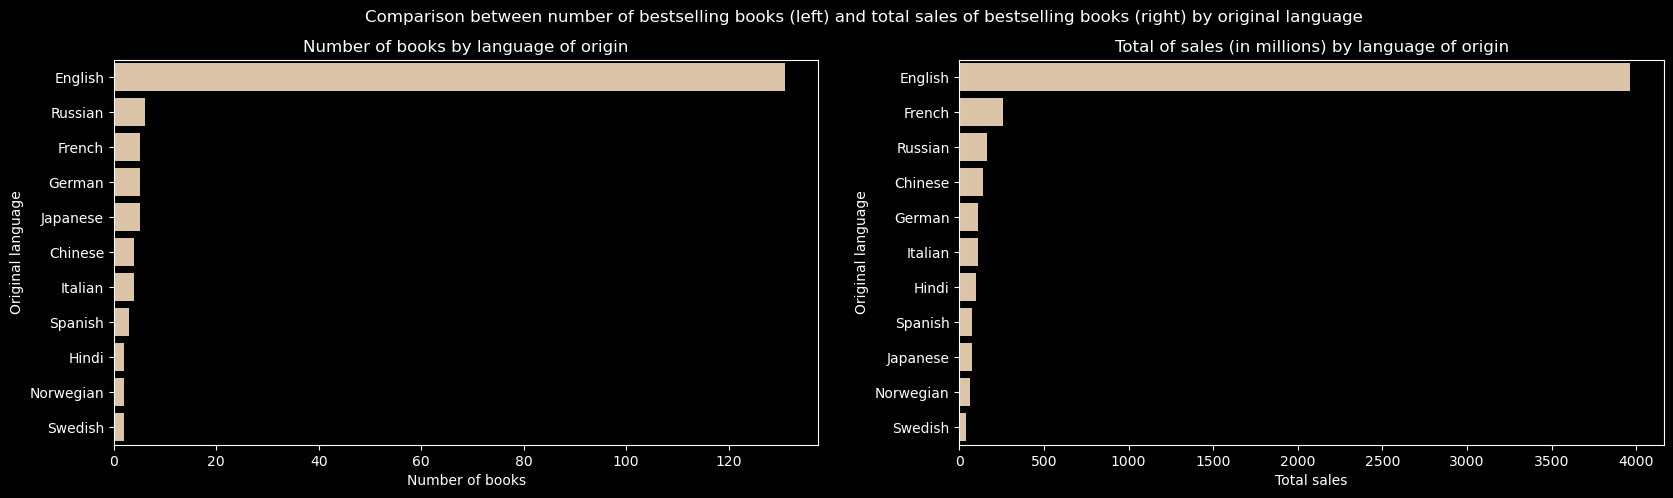

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
fig.suptitle('Comparison between number of bestselling books (left) and total sales of bestselling books (right) by original language')

sns.barplot(data=sales_lang, 
            x='Number of books',
            y='Original language',
            order=sales_lang.sort_values('Number of books',ascending = False)['Original language'],
            ax=ax[0],
            color='#E4C59E')
ax[0].set_title('Number of books by language of origin')

sns.barplot(data=sales_lang, 
            y='Original language', 
            x='Total sales',
            orient='h',
            order=sales_lang.sort_values('Total sales',ascending = False)['Original language'],
            ax=ax[1],
            color='#E4C59E')
ax[1].set_title('Total of sales (in millions) by language of origin')


English is the most dominant language of origin for these all time bestselling books, with 131 books (out of 175 books) made it to the bestselling list.

Because there is an overwhelming number of English books in the list, it makes sense that their sum of sales outperformed other languages.

What would make better sense is looking at the distribution of sales for each language of origin.

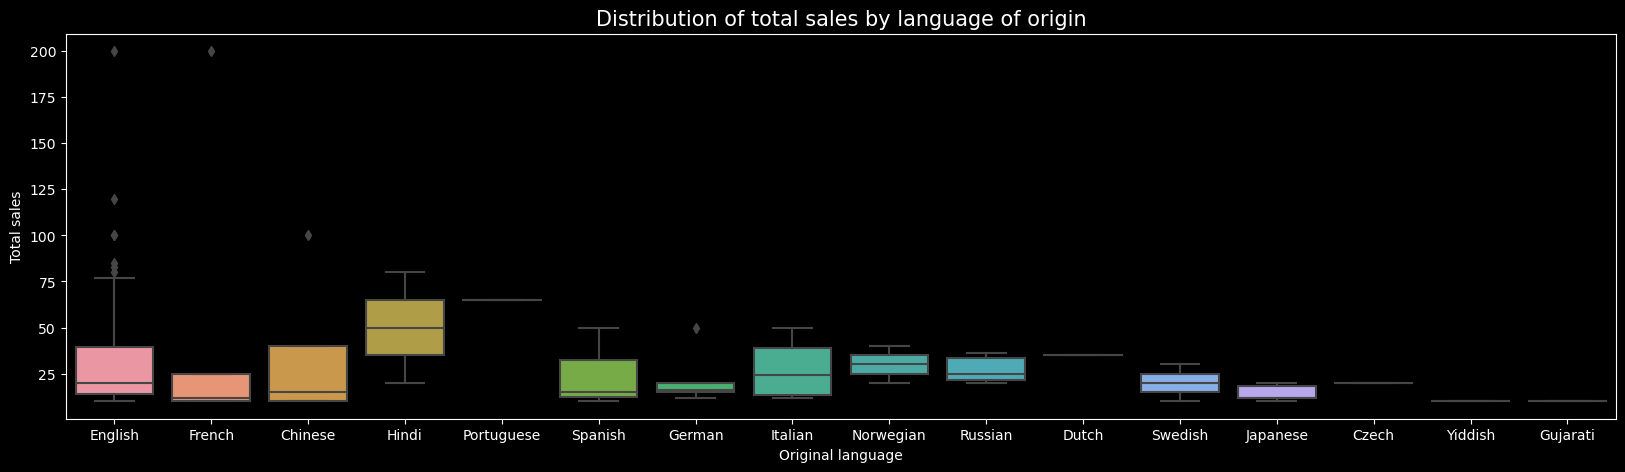

In [22]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=book_sales, 
            x='Original language',
            y='Total sales')
plt.title('Distribution of total sales by language of origin', fontdict={'size': 15})
plt.show()

Books with Hindi as the language of origin, despite having less those of English origin, has a much higher sales (in millions).

Books with English as the language of origin have more outliers compared the the other languages.

This leads to the question: What are the top 10 books with the highest sales records of all time?

In [23]:
top_10 = book_sales.sort_values(by=['Total sales'], ascending=False).head(10) # sort by sales, only take top 10
top_10

,Book,Total sales,Original language
0,A Tale of Two Cities,200.0,English
1,The Little Prince,200.0,French
2,Harry Potter and the Philosopher's Stone,120.0,English
4,Dream of the Red Chamber,100.0,Chinese
5,The Hobbit,100.0,English
3,And Then There Were None,100.0,English
6,"The Lion, the Witch and the Wardrobe",85.0,English
7,She: A History of Adventure,83.0,English
8,Vardi Wala Gunda,80.0,Hindi
9,The Da Vinci Code,80.0,English


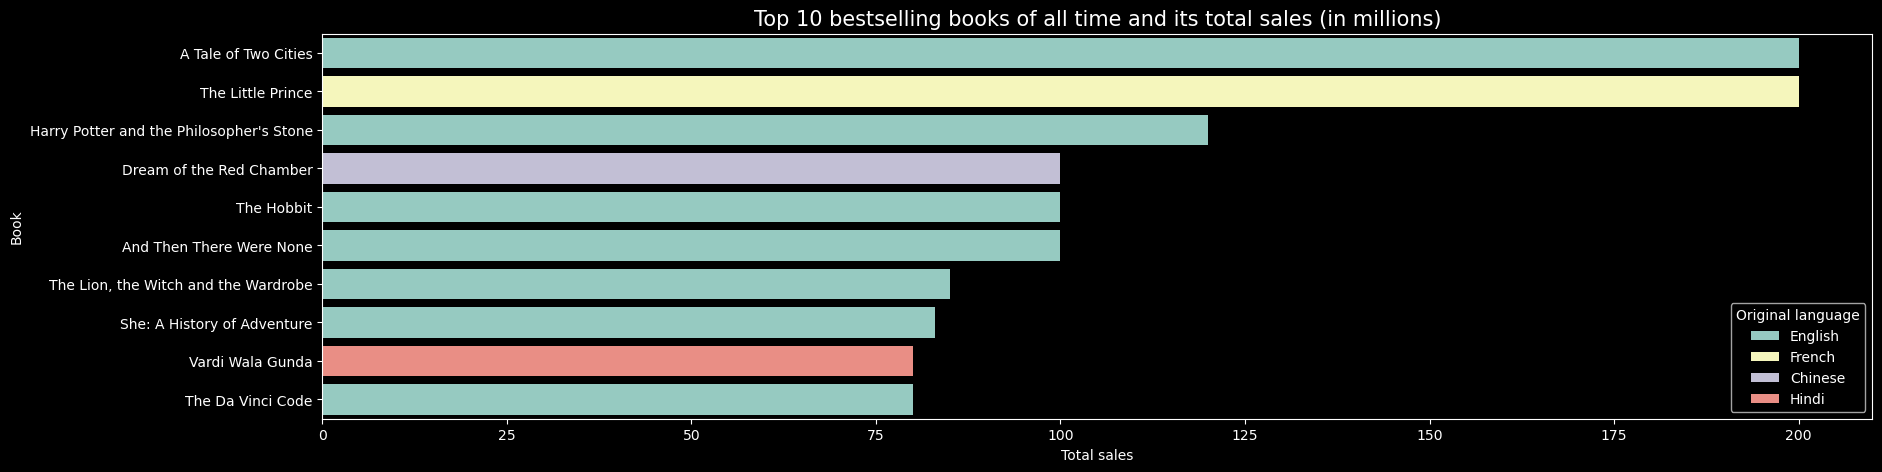

In [24]:
plt.figure(figsize=(20, 5))
sns.barplot(data=top_10, 
            x='Total sales', 
            y='Book',
            orient='h',
            hue='Original language',
            dodge=False) # this to remove the behavior expecting two values of a groups
plt.title('Top 10 bestselling books of all time and its total sales (in millions)', fontdict={'size': 15})
plt.show()

A Tale of Two Cities and The Little Prince tied in having the highest sales of all time.

There are three books of original language different than English: The Little Prince, Dream of the Red Chamber, and Vardi Wala Gunda.

All the top 10 books are fictional novel.

## Which author has the most sales of all time?

In [25]:
author = books[['Book', 'Author(s)', 'Total sales']] # create a df for authors and their sales
author

,Book,Author(s),Total sales
0,A Tale of Two Cities,Charles Dickens,200.0
1,The Little Prince,Antoine de Saint-Exupéry,200.0
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,120.0
3,And Then There Were None,Agatha Christie,100.0
4,Dream of the Red Chamber,Cao Xueqin,100.0
...,...,...,...
169,The Goal,Eliyahu M. Goldratt,10.0
170,Fahrenheit 451,Ray Bradbury,10.0
171,Angela's Ashes,Frank McCourt,10.0
172,The Story of My Experiments with Truth,Mohandas Karamchand Gandhi,10.0


In [26]:
author_sales = author.groupby('Author(s)')['Total sales'].sum().reset_index()
author_sales

,Author(s),Total sales
0,Agatha Christie,100.0
1,Albert Camus,22.0
2,Alex Comfort,10.0
3,Alexander Alexandrovich Fadeyev,26.0
4,Alice Sebold,10.0
...,...,...
152,William Peter Blatty,11.0
153,Xaviera Hollander,20.0
154,Xue Muqiao,10.0
155,Yann Martel,10.0


In [27]:
top_5_author = author_sales.sort_values(by='Total sales', ascending=False).head(5)
top_5_author

,Author(s),Total sales
58,J. K. Rowling,522.0
9,Antoine de Saint-Exupéry,200.0
22,Charles Dickens,200.0
26,Dan Brown,149.0
0,Agatha Christie,100.0


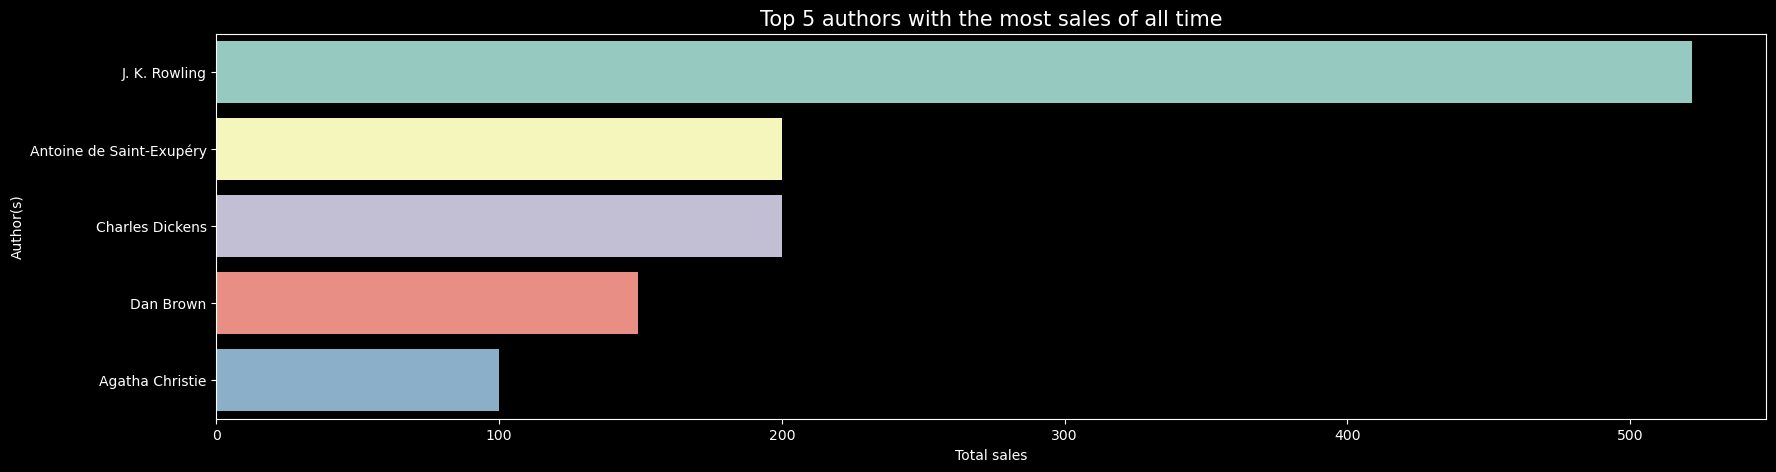

In [28]:
plt.figure(figsize=(20, 5))
sns.barplot(data=top_5_author, 
            x='Total sales', 
            y='Author(s)',
            orient='h') 
plt.title('Top 5 authors with the most sales of all time', fontdict={'size': 15})
plt.show()

In [29]:
author.groupby('Author(s)')['Book'].count().reset_index().sort_values(by='Book', ascending=False).head(10)

,Author(s),Book
58,J. K. Rowling,7
139,Suzanne Collins,3
26,Dan Brown,3
125,Roald Dahl,3
83,Ken Follett,2
34,E. L. James,2
43,Erskine Caldwell,2
48,George Orwell,2
1,Albert Camus,2
112,Patricia Nell Warren,1


J.K. Rowling outsold any other authors on the list with her Harry Potter series. She's also the only author with 7 entries in the list.